# Single Layer LSTM and Multiple Layer LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

In [2]:
dataset,info = tfds.load("imdb_reviews/subwords8k",with_info = True,as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete11LH3X/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete11LH3X/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete11LH3X/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

# Single Layer LSTM

In [13]:
# Prepare the dataset
buffer_size = 10000
batch_size = 256

# Test Train splits
train_data,test_data = dataset['train'],dataset['test']
# shuffle the dataset
train_dataset = train_data.shuffle(buffer_size)
# batch and pad the dataset to maximum length of the sequences
train_dataset = train_dataset.padded_batch(batch_size)
test_dataset = test_data.padded_batch(batch_size)

In [14]:
# Build and compile the model
# Single Layer LSTM
# Hyperparameters


embedding_dim = 64
lstm_dim = 64
dense_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [20]:
history = model.fit(train_dataset,epochs = 10,validation_data = test_dataset)

Epoch 1/10
98/98 [==============================] - 26s 265ms/step - loss: 0.1441 - accuracy: 0.9517 - val_loss: 0.5163 - val_accuracy: 0.8305
Epoch 2/10
98/98 [==============================] - 29s 288ms/step - loss: 0.1092 - accuracy: 0.9663 - val_loss: 0.5645 - val_accuracy: 0.8268
Epoch 3/10
98/98 [==============================] - 26s 262ms/step - loss: 0.0988 - accuracy: 0.9692 - val_loss: 0.5987 - val_accuracy: 0.8148
Epoch 4/10
98/98 [==============================] - 22s 224ms/step - loss: 0.0907 - accuracy: 0.9728 - val_loss: 0.6274 - val_accuracy: 0.8230
Epoch 5/10
98/98 [==============================] - 22s 225ms/step - loss: 0.0818 - accuracy: 0.9753 - val_loss: 0.7034 - val_accuracy: 0.8137
Epoch 6/10
98/98 [==============================] - 22s 217ms/step - loss: 0.0791 - accuracy: 0.9766 - val_loss: 0.7013 - val_accuracy: 0.8214
Epoch 7/10
98/98 [==============================] - 21s 210ms/step - loss: 0.0620 - accuracy: 0.9824 - val_loss: 0.7570 - val_accuracy: 0.8142

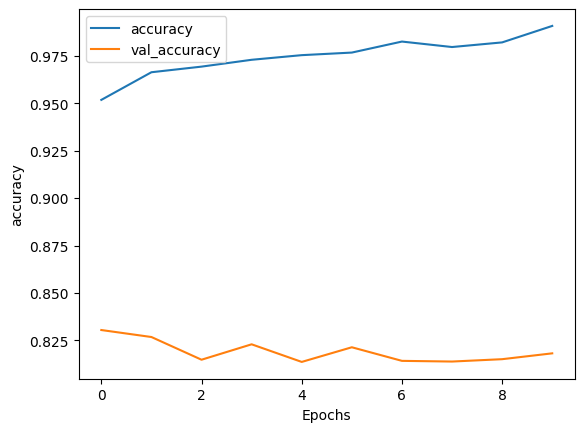

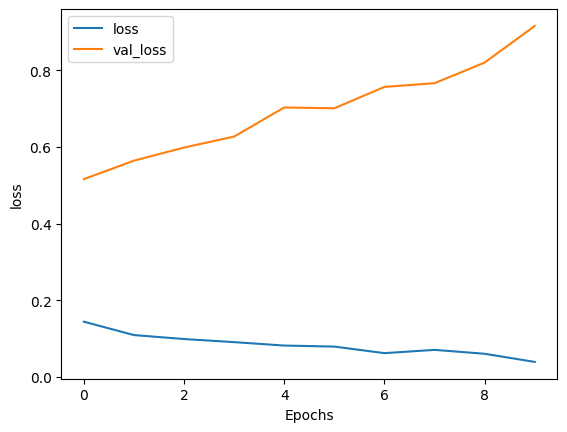

In [21]:


# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# MultiLayer LSTM

In [27]:
# showing the difference between return sequence = True and False
# Hyperparameters
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

# Define array input with random values
random_input = np.random.rand(batch_size,timesteps,features)
print(f"shape of input : {random_input.shape}")

# Define LSTM that return a single output
lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f"shape of the lstm output (return sequence = False):{result.shape}")

# Define LSTM that returns a sequence
lstm_rs = tf.keras.layers.LSTM(lstm_dim,return_sequences = True)
result = lstm_rs(random_input)
print(f"shape of the lstm output (return sequence = True) : {result.shape}")

shape of input : (1, 20, 16)
shape of the lstm output (return sequence = False):(1, 8)
shape of the lstm output (return sequence = True) : (1, 20, 8)


In [28]:
# Hyperparameters

embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [33]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 59s 519ms/step - loss: 0.6009 - accuracy: 0.6661 - val_loss: 0.5124 - val_accuracy: 0.7659
Epoch 2/10
98/98 [==============================] - 46s 466ms/step - loss: 0.4071 - accuracy: 0.8262 - val_loss: 0.4137 - val_accuracy: 0.8256
Epoch 3/10
98/98 [==============================] - 42s 426ms/step - loss: 0.3009 - accuracy: 0.8811 - val_loss: 0.3812 - val_accuracy: 0.8389
Epoch 4/10
98/98 [==============================] - 42s 427ms/step - loss: 0.2407 - accuracy: 0.9108 - val_loss: 0.3906 - val_accuracy: 0.8332
Epoch 5/10
98/98 [==============================] - 41s 420ms/step - loss: 0.1908 - accuracy: 0.9328 - val_loss: 0.4182 - val_accuracy: 0.8539
Epoch 6/10
98/98 [==============================] - 40s 408ms/step - loss: 0.1345 - accuracy: 0.9555 - val_loss: 0.4564 - val_accuracy: 0.8368
Epoch 7/10
98/98 [==============================] - 40s 408ms/step - loss: 0.1156 - accuracy: 0.9624 - val_loss: 0.5727 - val_accuracy: 0.8442

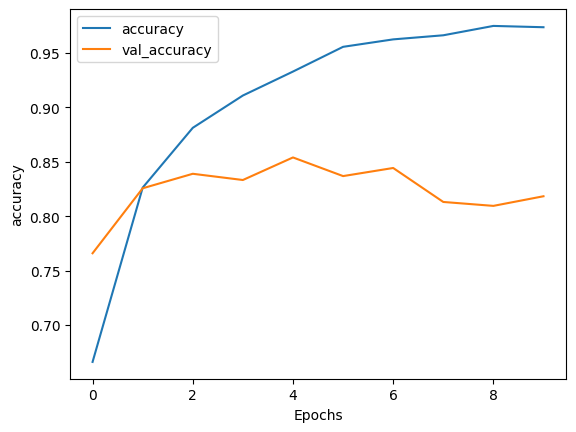

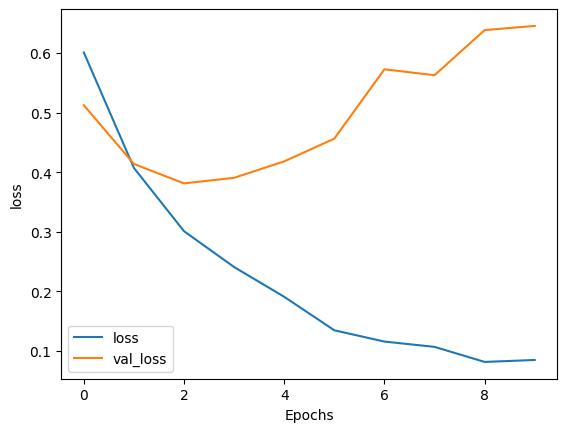

In [34]:


# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")